# Step 1: Reading and Understanding the Data

### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset:

In [2]:
housing = pd.read_csv("train.csv")
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### Getting idea about number of rows and columns:

In [3]:
housing.shape

(1460, 81)

##### Reading Statistics:

In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Checking Data Types:

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Step 2: Data Cleaning and  Preparation

##### Checking Missing Values:

In [6]:
missing_value = round(100 * (housing.isnull().sum()/housing.shape[0]), 2).sort_values(ascending = False)
missing_value

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

##### After reading the data description, it is not good to remove columns with high missing value. It will lead to data/information loss. Let's treat missing value as per the data mentioned in data description file:

In [7]:
housing['PoolQC'] = housing['PoolQC'].fillna('No Pool')
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')
housing['Alley'] = housing['Alley'].fillna('No alley access')
housing['Fence'] = housing['Fence'].fillna('No Fence')
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No Fireplace')
housing['LotFrontage'] = housing['LotFrontage'].fillna(0)
housing['GarageCond'] = housing['GarageCond'].fillna('No Garage')
housing['GarageFinish'] = housing['GarageFinish'].fillna('No Garage')
housing['GarageQual'] = housing['GarageQual'].fillna('No Garage')
housing['GarageType'] = housing['GarageType'].fillna('No Garage')
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('No Basement')
housing['BsmtCond'] = housing['BsmtCond'].fillna('No Basement')
housing['BsmtQual'] = housing['BsmtQual'].fillna('No Basement')
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

##### Re-cheking missing values:

In [8]:
round(100 * (housing.isnull().sum()/housing.shape[0]), 2).sort_values(ascending = False)

GarageYrBlt      5.55
Electrical       0.07
SalePrice        0.00
ExterCond        0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
YearRemodAdd     0.00
YearBuilt        0.00
TotalBsmtSF      0.00
OverallCond      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
BsmtUnfSF        0.00
HeatingQC        0.00
Heating          0.00
ScreenPorch      0.00
GarageQual       0.00
GarageCond

Now we have only 2 columns with missing values. We can drop missing values in the column `GarageYrBlt` because missing values show there is no Garage in the house. Also, for the column `Electrical`, there in only one missing value, so we can drop the missing value in this column as well.

In [9]:
housing = housing.dropna()

##### Re-cheking missing values:

In [10]:
round(100 * (housing.isnull().sum()/housing.shape[0]), 2).sort_values(ascending = False)

SalePrice        0.0
Heating          0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
LandContour      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
Utilities        0.0
OverallQual      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
TotalBsmtSF      0.0
HeatingQC        0.0
SaleCondition    0.0
CentralAir       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF   

In [11]:
housing.shape

(1378, 81)

##### Few columns should be in categorical type, but they are continuous. Converting those to be categorical:

In [12]:
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype('object')
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype('object')
housing['FullBath'] = housing['FullBath'].astype('object')
housing['HalfBath'] = housing['HalfBath'].astype('object')
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].astype('object')
housing['KitchenAbvGr'] = housing['KitchenAbvGr'].astype('object')
housing['TotRmsAbvGrd'] = housing['TotRmsAbvGrd'].astype('object')
housing['Fireplaces'] = housing['Fireplaces'].astype('object')
housing['GarageCars'] = housing['GarageCars'].astype('object')

##### Deriving new columns `YearBuilt_Age`, `YearRemodAdd_Age`, `GarageYrBlt_Age` and `YrSold_Age` as Age of the columns by substracting columns `YearBuilt`, `YearRemodAdd`, `GarageYrBlt` and `YrSold` from the current year:

In [13]:
from datetime import date
housing['YearBuilt_Age'] = date.today().year - housing['YearBuilt']
housing['YearRemodAdd_Age'] = date.today().year - housing['YearRemodAdd']
housing['GarageYrBlt_Age'] = date.today().year - housing['GarageYrBlt']
housing['YrSold_Age'] = date.today().year - housing['YrSold']

##### Dropping original columns:

In [14]:
housing = housing.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'])

##### Dropping the column `Id` as there is no use of it:

In [15]:
housing = housing.drop('Id', axis=1)

##### Getting list of numerical columns:

In [16]:
num_vars = list(housing.columns[housing.dtypes != 'object'])
num_vars

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'GarageYrBlt_Age',
 'YrSold_Age']

In [17]:
len(num_vars)

26

##### Checking Outliers:

In [18]:
housing[num_vars].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.97, 0.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,57.755443,10696.509434,108.443396,455.909289,48.137155,570.900581,1074.947025,1177.436865,353.216981,4.137881,1534.791727,500.835269,97.455007,47.310595,21.054427,3.612482,15.957184,2.923077,42.920174,6.335269,2007.812046,185492.558781,47.065312,34.580552,41.514514,12.187954
std,35.048536,10218.377673,184.238932,459.694234,164.379207,443.810361,436.133293,386.987388,439.644876,40.144961,519.315134,185.728067,126.745170,65.221688,60.554428,30.165473,57.268764,41.350477,501.794706,2.697413,1.330695,79051.093697,29.377049,20.444010,24.686740,1.330695
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000,10.000000,10.000000,10.000000,10.000000
5%,0.000000,3375.750000,0.000000,0.000000,0.000000,0.000000,540.000000,688.550000,0.000000,0.000000,864.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,97925.000000,13.000000,13.000000,13.000000,10.000000
25%,41.250000,7740.500000,0.000000,0.000000,0.000000,227.500000,810.250000,894.000000,0.000000,0.000000,1154.000000,380.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,134000.000000,19.000000,16.000000,18.000000,11.000000
50%,64.000000,9591.000000,0.000000,400.000000,0.000000,477.500000,1008.000000,1098.500000,0.000000,0.000000,1479.000000,484.000000,0.000000,27.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167700.000000,44.000000,26.000000,40.000000,12.000000
75%,79.000000,11712.750000,170.750000,732.000000,0.000000,811.000000,1314.000000,1414.000000,738.750000,0.000000,1790.000000,581.000000,171.000000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217875.000000,65.000000,52.000000,59.000000,13.000000
90%,92.300000,14575.900000,338.600000,1079.900000,125.600000,1237.900000,1616.000000,1687.000000,975.000000,0.000000,2169.900000,770.600000,264.000000,130.000000,108.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,281725.700000,94.000000,70.000000,75.000000,14.000000
95%,104.150000,17508.850000,459.750000,1277.450000,401.650000,1471.500000,1763.450000,1839.450000,1143.350000,0.000000,2474.350000,856.150000,340.300000,172.300000,180.450000,0.000000,165.450000,0.000000,0.000000,11.000000,2010.000000,335000.000000,100.150000,70.000000,90.000000,14.000000


##### Checking outliers using Box-plot:

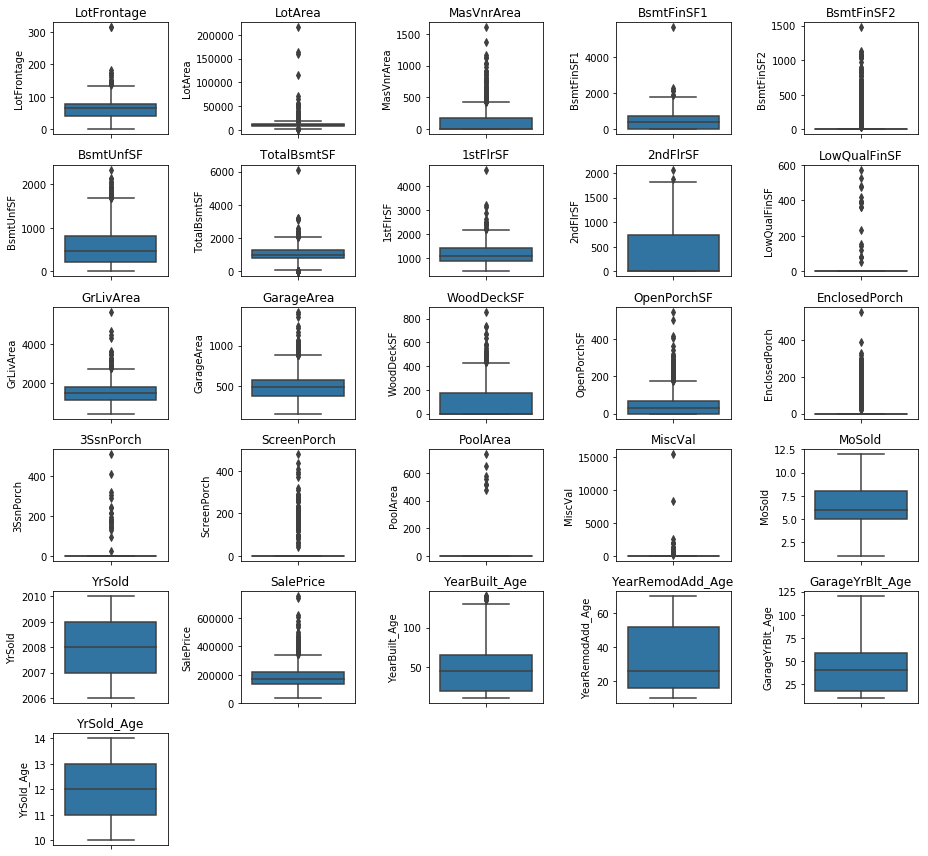

In [19]:
plt.figure(figsize=(13,12))
for i in range(0, len(num_vars)):
    plt.subplot(6,5,i+1)
    sns.boxplot(y=housing[num_vars[i]], data=housing)
    plt.title(num_vars[i])
    plt.tight_layout()

##### Treating Outliers using IQR method:

In [20]:
outlier_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
def treat_outliers(x):
    for i in outlier_cols:
        Q1 = x[i].quantile(0.05)
        Q3 = x[i].quantile(0.95)
        IQR = Q3-Q1
        x =  x[(x[i] >= (Q1-(1.5*IQR))) & (x[i] <= (Q3+(1.5*IQR)))] 
    return x      

housing = treat_outliers(housing)

# Step 3: Data Visualization

##### Scatter Plot of numerical values:

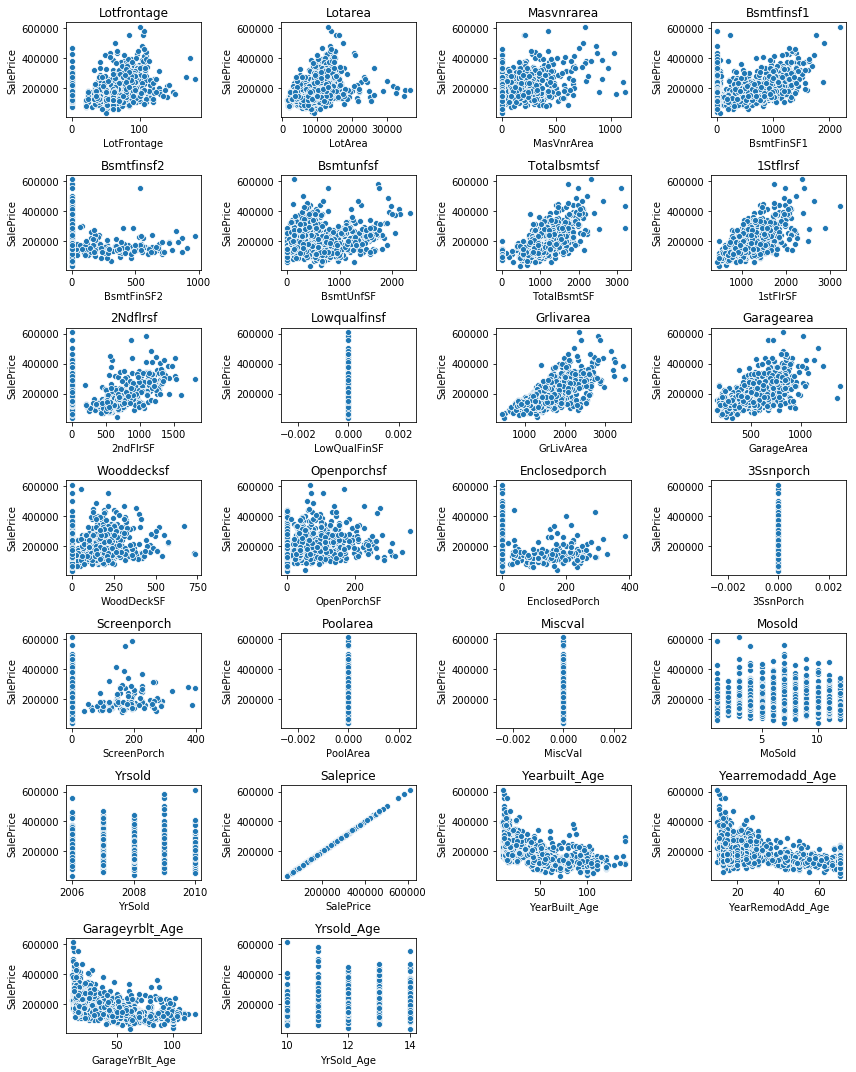

In [21]:
plt.figure(figsize=(12,15))
for i in range(len(num_vars)):
    plt.subplot(7,4,i+1)
    sns.scatterplot(x=housing[num_vars[i]], y='SalePrice', data=housing)
    plt.title(num_vars[i].title())
    #plt.xticks(rotation=90)
    plt.tight_layout()

##### Bar Plot of Categorical variables:

In [22]:
housing_cat = housing.select_dtypes(include=['object'])

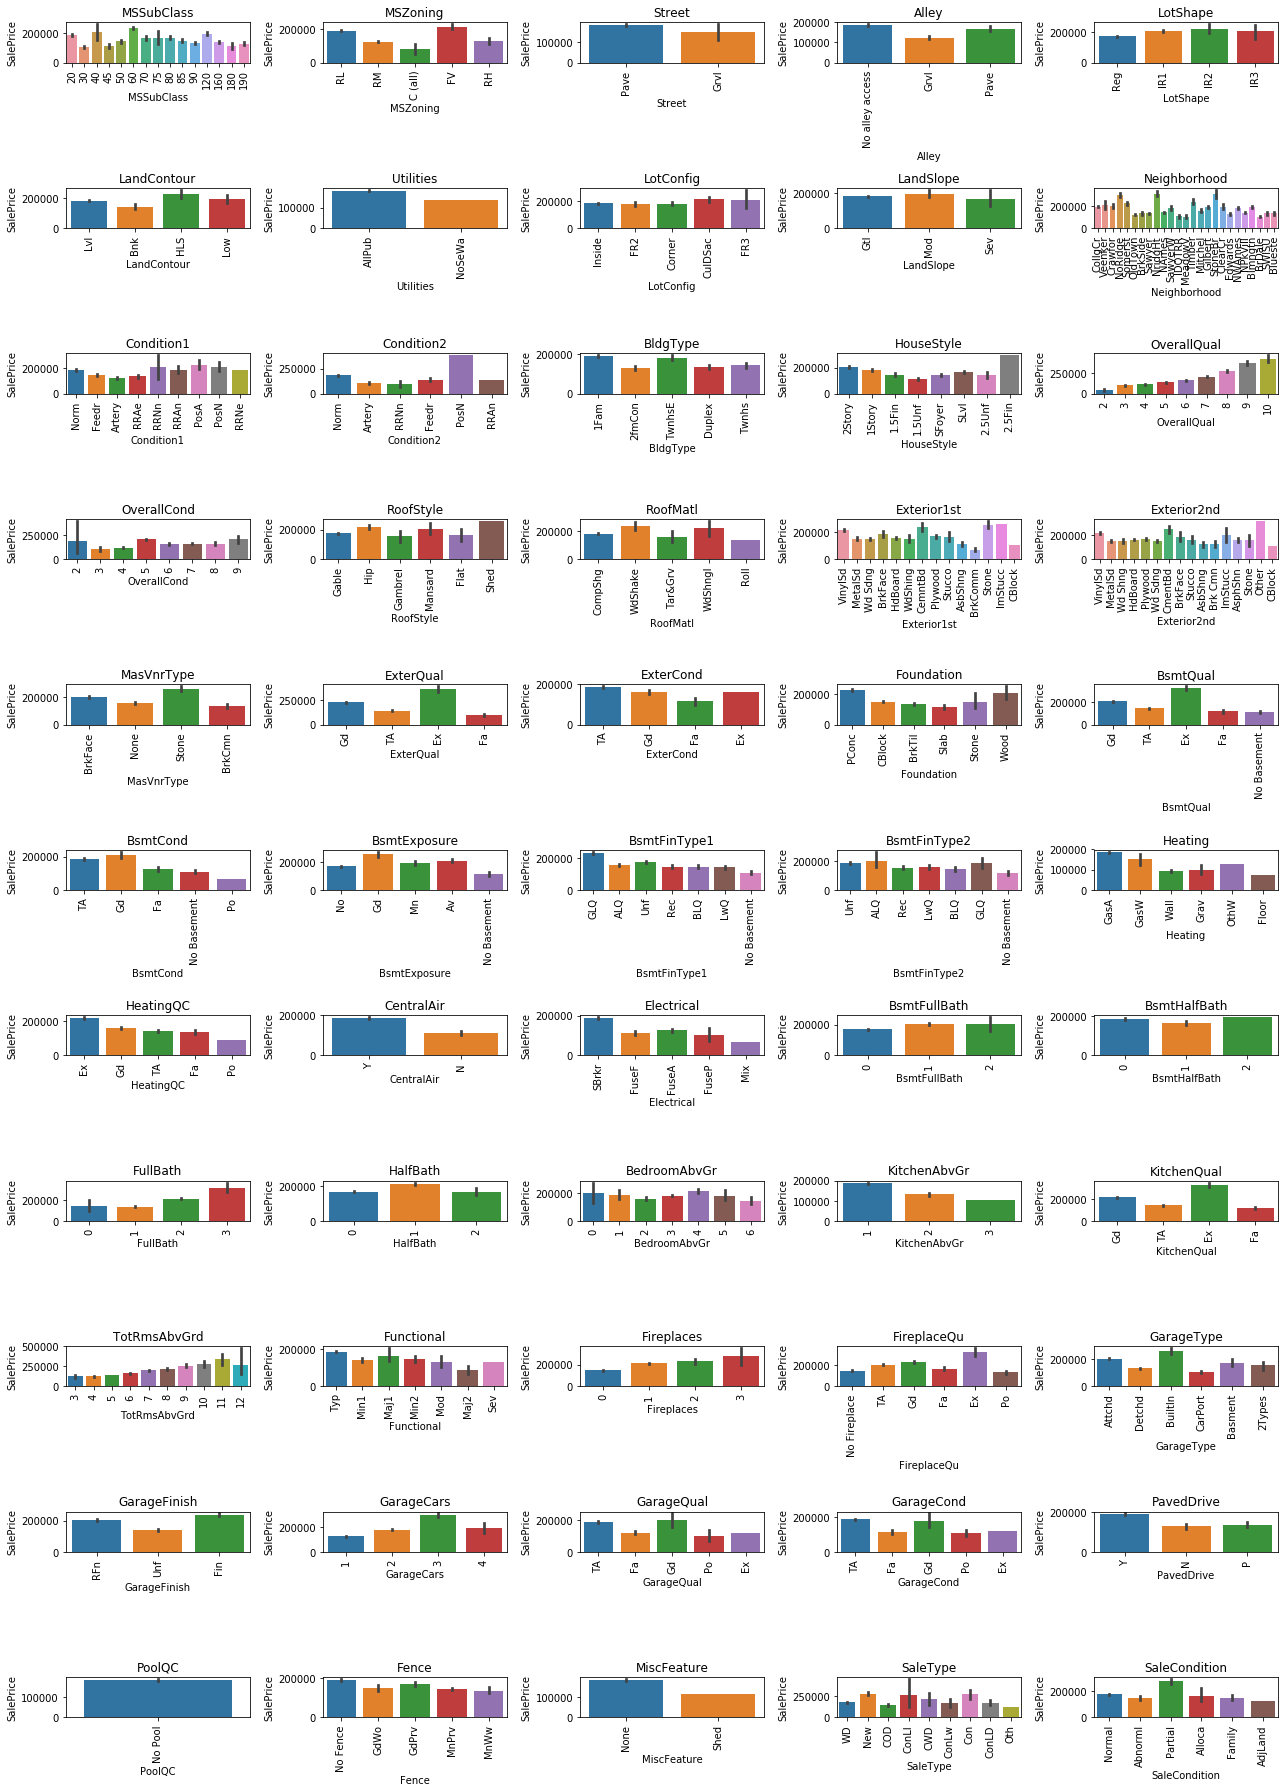

In [23]:
plt.figure(figsize=(18,25))
for i in range(len(housing_cat.columns)):
    plt.subplot(11,5,i+1)
    sns.barplot(x=housing_cat[housing_cat.columns[i]], y='SalePrice', data=housing)
    plt.title(housing_cat.columns[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

##### Histogram of SalesPrice column:

Text(0.5,1,'Variation of SalesPrice')

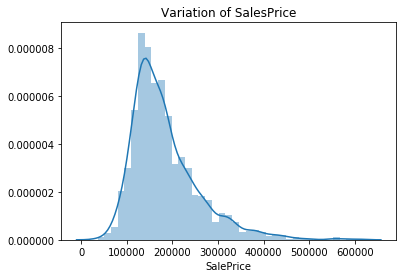

In [24]:
sns.distplot(housing['SalePrice'])
plt.title("Variation of SalesPrice")

We can see that the values SalesPrice column are distributed normally.

# Step 4: Creation of Dummy Variables:

##### There is a single column `CentralAir` with 'Y' and 'N' values. Let's convert 'Y' and 'N' to 1 and 0:

In [25]:
housing['CentralAir'] = housing['CentralAir'].map({'Y':1, 'N':0})

In [26]:
housing_cat = housing.select_dtypes(include=['object'])

In [27]:
len(list(housing_cat.columns))

54

##### Creating dummy variables for rest of the categorical variables:

In [28]:
housing_dummies = pd.get_dummies(housing_cat, drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCon

##### Removing original columns:

In [29]:
housing = housing.drop(housing_cat.columns, 1)

In [30]:
housing.shape

(1259, 27)

##### Joining dummy Dataframe with the original Dataframe:

In [31]:
housing = pd.concat([housing, housing_dummies], axis=1)

In [32]:
housing.shape

(1259, 293)

In [33]:
housing.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,Firepla

# Step 5: Train-Test Split and feature scaling:

In [34]:
df_train, df_test = train_test_split(housing, train_size=0.7, test_size=0.3, random_state=100)

In [35]:
df_train.shape

(881, 293)

In [36]:
df_test.shape

(378, 293)

##### Getting new numerical collumns:

In [37]:
num_vars2 = list(housing.columns[housing.dtypes != 'object'])

In [38]:
len(num_vars2)

293

##### Standardizing numerical data:

In [39]:
scaler = StandardScaler()
df_train[num_vars2] = scaler.fit_transform(df_train[num_vars2])
df_test[num_vars2] = scaler.transform(df_test[num_vars2])

In [40]:
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,Firepla

# Step 6: Model Building:

### Dividing data into X and y variables:

##### For training set:

In [41]:
y_train = df_train.pop('SalePrice')
X_train = df_train

##### For test set:

In [42]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [43]:
len(X_train.columns)

292

## Ridge Regression

In [44]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
folds = 5
model_cv1 = GridSearchCV(estimator=ridge, 
                         param_grid=params, 
                         scoring='neg_mean_absolute_error', 
                         cv=folds, 
                         return_train_score=True, 
                         verbose=1)
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

##### Creting a new DataFrame "cv_results1":

In [45]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)

##### Plotting Negative Mean Absolute Error and alpha graph for Ridge Regression:

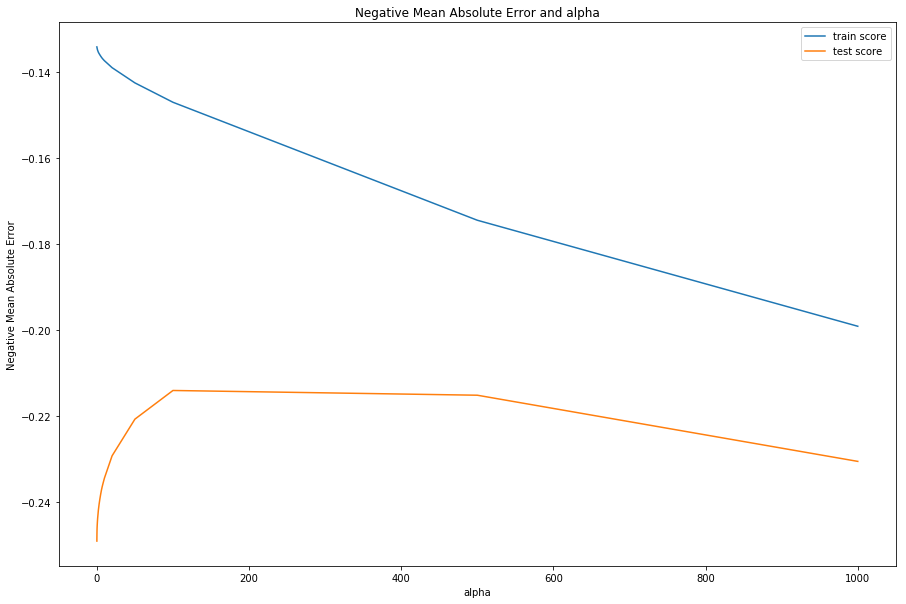

In [46]:
plt.figure(figsize=(15,10))
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('float32')

plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

As per the above graph best value of alpha seems between 0 and 200. Let's take it 100. The same we can get using below command:

In [47]:
model_cv1.best_params_

{'alpha': 100}

In [48]:
model_cv1.best_score_

-0.21406056301712034

##### Fitting the Ridge Regression using best value of alpha = 100:

In [49]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.27308311e-02,  5.29500684e-02,  3.49581567e-02,  8.62204007e-02,
        6.63358253e-03,  6.30301568e-03,  1.00858980e-01,  5.47201507e-03,
        9.71102827e-02,  6.61031485e-02,  0.00000000e+00,  1.34602886e-01,
        3.07518735e-02,  2.08088107e-02,  2.38251408e-02,  1.42041290e-02,
        0.00000000e+00,  3.37286540e-02,  0.00000000e+00,  0.00000000e+00,
       -1.71798588e-03,  1.53347811e-03, -5.48212414e-02, -4.24806688e-02,
       -6.85146357e-03, -1.53347811e-03, -3.66340783e-03,  4.40802170e-03,
        6.41805117e-03,  1.02690384e-02,  1.53275504e-02,  1.37764768e-02,
        8.03999808e-03, -7.08670018e-03, -6.51856178e-03, -7.29174390e-03,
       -2.09306274e-02, -2.25053378e-02, -6.71865141e-03, -7.03035686e-03,
        3.50825560e-02, -1.51888159e-03,  1.95323891e-02, -4.51782908e-03,
        2.66090729e-02,  6.92665951e-03, -4.83672373e-03, -1.25587879e-02,
        3.98393928e-03, -2.20929945e-03, -6.23905832e-04, -5.91925514e-03,
        2.22642808e-04, -

##### Predicting train and test data and calculating r2_score:

In [50]:
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)
print('Training R2_Score: {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred_ridge)))
print('Test R2_Score: {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred_ridge)))

Training R2_Score: 0.9494964624935271
Test R2_Score: 0.9053702122524974


In [51]:
ridge.score(X_test, y_test)

0.9053702122524974

In [52]:
mean_sqr_error = np.mean((y_test_pred_ridge - y_test)**2)
print('Mean Square Error: {}'.format(mean_sqr_error))

Mean Square Error: 0.09869374477119161


##### Creating a DataFrame with significant features which are contributing to predict the Price:

In [53]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coefficient']

In [54]:
intercept_ridge = model_parameter[0]
round(intercept_ridge, 4)

0.0

##### Getting top 10 features:

In [55]:
ridge_coef.sort_values(by='Coefficient',ascending=False).head(10)

,Feaure,Coefficient
12,GarageArea,0.134603
115,OverallQual_10,0.101228
7,CentralAir,0.100859
9,2ndFlrSF,0.097110
116,OverallCond_3,0.086533
4,BsmtFinSF2,0.086220
10,LowQualFinSF,0.066103
82,Neighborhood_Timber,0.064911
76,Neighborhood_OldTown,0.058786
114,OverallQual_9,0.056938


As per the Ridge Rgression, below are the top 10 variables which are significant in predicting the price of a house:
- GarageArea
- OverallQual_10
- CentralAir
- 2ndFlrSF
- OverallCond_3
- BsmtFinSF2
- LowQualFinSF
- Neighborhood_Timber
- Neighborhood_OldTown
- OverallQual_9

#### Summary:
- Ridge Regression results a complex model and there are many non-zero coefficients.
- There is no `Feature Selection` in Ridge Regression.

## Lasso Regression    

In [56]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()
folds = 5
model_cv2 = GridSearchCV(estimator=lasso, 
                         param_grid=params, 
                         scoring='neg_mean_absolute_error', 
                         cv=folds, 
                         return_train_score=True, 
                         verbose=1)
model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

##### Creting a new DataFrame "cv_results2":

In [57]:
cv_results2 = pd.DataFrame(model_cv2.cv_results_)
cv_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.229629,0.037153,0.000399,0.000488,0.0001,{'alpha': 0.0001},-0.192858,-0.286340,-0.243579,-0.243069,-0.245201,-0.242153,0.029676,4,-0.144875,-0.128036,-0.135990,-0.132337,-0.133180,-0.134883,0.005610
1,0.119089,0.013390,0.000791,0.000396,0.001,{'alpha': 0.001},-0.186519,-0.256026,-0.225434,-0.229046,-0.220695,-0.223502,0.022239,2,-0.147824,-0.133271,-0.141113,-0.137700,-0.138136,-0.139609,0.004811
2,0.029223,0.008464,0.000797,0.000746,0.01,{'alpha': 0.01},-0.182281,-0.217023,-0.197016,-0.208107,-0.202869,-0.201437,0.011639,1,-0.171982,-0.163174,-0.172354,-0.166729,-0.165431,-0.167934,0.003642
3,0.033910,0.012473,0.002593,0.002721,0.05,{'alpha': 0.05},-0.201475,-0.239509,-0.242104,-0.242360,-0.221073,-0.229273,0.016022,3,-0.221551,-0.215876,-0.217610,-0.220715,-0.218720,-0.218894,0.002057
4,0.022938,0.008320,0.001197,0.001465,0.1,{'alpha': 0.1},-0.230435,-0.276862,-0.290114,-0.287750,-0.274199,-0.271825,0.021630,5,-0.263192,-0.258879,-0.259990,-0.265795,-0.262829,-0.262137,0.002457
5,0.018946,0.005644,0.000599,0.000489,0.2,{'alpha': 0.2},-0.283460,-0.357775,-0.365770,-0.366750,-0.369016,-0.348480,0.032822,6,-0.343467,-0.341478,-0.342008,-0.347301,-0.344584,-0.343768,0.002078
6,0.017753,0.007865,0.000399,0.000489,0.3,{'alpha': 0.3},-0.339261,-0.447188,-0.430704,-0.456686,-0.452110,-0.425092,0.043922,7,-0.419480,-0.420743,-0.418084,-0.428843,-0.420716,-0.421573,0.003764
7,0.014761,0.001323,0.000200,0.000399,0.4,{'alpha': 0.4},-0.412690,-0.542920,-0.506896,-0.549118,-0.544124,-0.511038,0.051557,8,-0.504450,-0.507835,-0.504988,-0.514295,-0.509907,-0.508295,0.003593
8,0.012366,0.002566,0.000800,0.000400,0.5,{'alpha': 0.5},-0.492376,-0.646037,-0.588110,-0.643342,-0.636757,-0.601201,0.058502,9,-0.593159,-0.598302,-0.598900,-0.604625,-0.599170,-0.598831,0.003637
9,0.012964,0.002362,0.000000,0.000000,0.6,{'alpha': 0.6},-0.567934,-0.737620,-0.660133,-0.706496,-0.716817,-0.677675,0.060588,10,-0.675543,-0.678742,-0.681659,-0.671941,-0.675298,-0.676637,0.003307


##### Plotting Negative Mean Absolute Error and alpha graph for Lasso Regression:

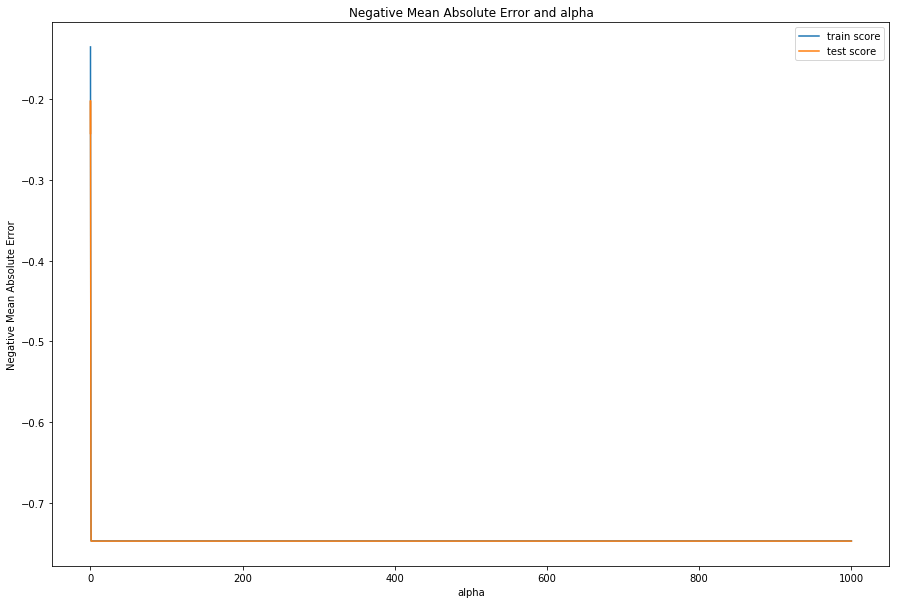

In [58]:
plt.figure(figsize=(15, 10))
cv_results2['param_alpha'] = cv_results2['param_alpha'].astype('float32')
plt.plot(cv_results2['param_alpha'], cv_results2['mean_train_score'])
plt.plot(cv_results2['param_alpha'], cv_results2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

##### Getting best value of alpha:

In [59]:
model_cv2.best_params_

{'alpha': 0.01}

In [60]:
model_cv2.best_score_

-0.2014374069536446

##### Fitting the Ridge Regression using best value of alpha = 0.01:

In [61]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.00669058,  0.0490915 ,  0.01884311,  0.08651619,  0.        ,
       -0.        ,  0.09913545,  0.00072736,  0.        ,  0.        ,
        0.        ,  0.35469819,  0.01981058,  0.00911307,  0.01522646,
        0.        ,  0.        ,  0.01699498,  0.        ,  0.        ,
       -0.        ,  0.        , -0.11031639, -0.05530721, -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.01218832, -0.        , -0.        ,
        0.01622725, -0.        ,  0.        , -0.0094033 ,  0.00865731,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.00440572,
       -0.00556003, -0.00500311, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00979091,  0.        , -0.        ,
        0.04422695, -0.01780688, -0.        , -0.        , -0.01

After looking at above coefficients, it is observed that most of the features are 0. Hence, it is clear that Lass Rgression performs Feature Selection.

##### Predicting train and test data and calculating r2_score:

In [62]:
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)
print('Training R2_Score: {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred_lasso)))
print('Test R2_Score: {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred_lasso)))

Training R2_Score: 0.9381886322316652
Test R2_Score: 0.9040842939397454


In [63]:
lasso.score(X_test, y_test)

0.9040842939397454

In [64]:
mean_sqr_error = np.mean((y_test_pred_lasso - y_test)**2)
print('Mean Square Error: {}'.format(mean_sqr_error))

Mean Square Error: 0.10003488794371973


##### Creating a DataFrame with significant features which are contributing to predict the Price:

In [65]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = df_train.columns
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coefficient']

In [66]:
intercept_lasso = model_parameter[0]
round(intercept_lasso, 4)

0.0

##### Getting top 10 features:

In [67]:
lasso_coef.sort_values(by='Coefficient',ascending=False).head(10)

,Feaure,Coefficient
12,GarageArea,0.354698
115,OverallQual_10,0.168750
116,OverallCond_3,0.128794
7,CentralAir,0.099135
114,OverallQual_9,0.097317
4,BsmtFinSF2,0.086516
263,GarageCars_4,0.062246
82,Neighborhood_Timber,0.056687
246,Fireplaces_1,0.049409
2,MasVnrArea,0.049092


As per the Lasso Rgression, below are the top 10 variables which are significant in predicting the price of a house:
- GarageArea
- OverallQual_10
- OverallCond_3
- CentralAir
- OverallQual_9
- BsmtFinSF2
- GarageCars_4	
- Neighborhood_Timber
- Fireplaces_1
- MasVnrArea

#### Summary:
- Lasso Regression results a simpler model with most of the coefficients with zero values.
- There is `Feature Selection` in Lasso Regression.

# Conclusion:

As per the analysis, we have received almost similar coefficients in both Ridge and Lasso Regression. Below are the top 10 predictor variables:

- #### Ridge Rgression:
    - GarageArea
    - OverallQual_10
    - CentralAir
    - 2ndFlrSF
    - OverallCond_3
    - BsmtFinSF2
    - LowQualFinSF
    - Neighborhood_Timber
    - Neighborhood_OldTown
    - OverallQual_9

- #### Lasso Regression:
    - GarageArea
    - OverallQual_10
    - OverallCond_3
    - CentralAir
    - OverallQual_9
    - BsmtFinSF2
    - GarageCars_4	
    - Neighborhood_Timber
    - Fireplaces_1
    - MasVnrArea

Also, Training and Test R2 Scores are good in both the models and Ridge Score and Lasso Score are also similar.

Below are the points:

- #### For Ridge Model:
    - Optimal Value of alpha = 100
    - Training R2_Score: 0.9494964624935271
    - Test R2_Score: 0.9053702122524974
    - Ridge Score: 0.9053702122524974
    - Mean Square Error: 0.09869374477119161
    - Equation:
    
    **$ SalesPrice = 0.134603  \times  GarageArea + 0.101228 \times OverallQual\_ 10 + 0.100859 \times CentralAir + 0.097110 \times 2ndFlrSF +  0.086533 \times OverallCond\_3 + 0.086220 \times BsmtFinSF2 + 0.066103 \times LowQualFinSF + 0.064911 \times Neighborhood\_Timber + 0.058786 \times Neighborhood\_OldTown + 0.056938 \times OverallQual\_9 $**
    
- #### For Lasso Model:   
    - Optimal Value of alpha = 0.01
    - Training R2_Score: 0.9381886322316652
    - Test R2_Score: 0.9040842939397454
    - Lasso Score: 0.9040842939397454
    - Mean Square Error: 0.10003488794371973
    - Equation:
    
    **$ SalesPrice = 0.354698  \times  GarageArea + 0.168750 \times OverallQual\_ 10 + 0.128794 \times OverallCond\_3 + 0.099135 \times CentralAir +  0.097317 \times OverallQual\_9 + 0.086516 \times BsmtFinSF2 + 0.062246 \times GarageCars\_4 +  0.056687 \times Neighborhood\_Timber + 0.049409 \times Fireplaces\_1 + 0.049092 \times MasVnrArea $**